In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df = pd.read_csv('SupplyChain.csv')

Droppig the masks and sanitizers column, will create another one

In [114]:
df = df.drop(columns = ['masks','sanitizers'])

In [115]:
df

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit
...,...,...,...,...,...,...,...
5277,5/30/2020,952,36,394,NaN,Punjab,Lahore
5278,5/31/2020,1184,22,120,NaN,Punjab,Lahore
5279,6/1/2020,1610,43,95,NaN,Punjab,Lahore
5280,6/2/2020,1639,30,353,NaN,Punjab,Lahore


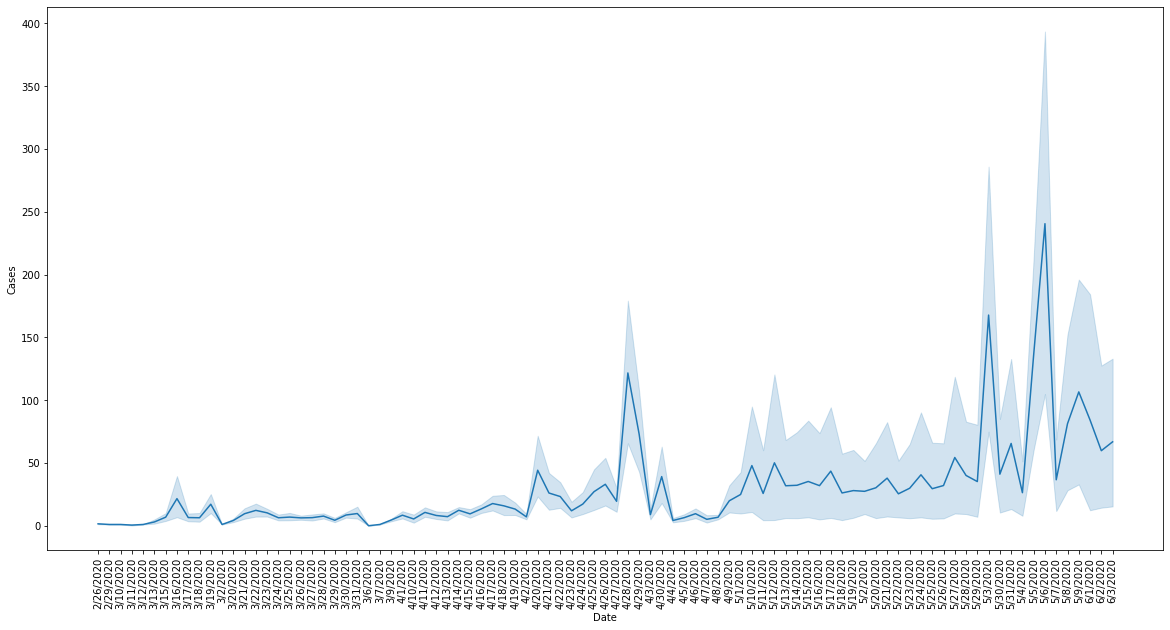

In [116]:
plt.figure(figsize=(20,10))
sns.lineplot(x = 'Date',y = 'Cases',data=df)
plt.xticks(rotation=90);

## above is the cases rate in the country with respect to date from march to june

In [117]:
unique = df['Province'].unique()
print(f"Total Provinces names are: \n{unique}")

Total Provinces names are: 
['Islamabad Capital Territory' 'Sindh' 'Gilgit-Baltistan' 'Baluchistan'
 'Punjab' 'Khyber Pakhtunkhwa' 'khyber Pakhtunkhwa' 'Azad Jummu Kashmir'
 'Federal Administration Tribal Area' 'islamabad Capital Territory']


<br><b> ADDING POPULATIONS FOR EACH PROVICES AND THE CAPITAL </b>

In [118]:
population ={'Islamabad Capital Territory':1.4*10000000,
            'islamabad Capital Territory':1.4*10000000,
            'Sindh':4.9*10000000,
            'Gilgit-Baltistan':1.5*10000000,
            'Baluchistan':12.5*10000000,
            'Punjab':28*10000000,
            'Khyber Pakhtunkhwa':36.2*10000000,
            'khyber Pakhtunkhwa':36.2*10000000,
            'Azad Jummu Kashmir':4.15*10000000,
            'Federal Administration Tribal Area':1.09*10000000,
            'Pakistan':212.2*10000000}

In [119]:
population_copy = population.copy()

<b> Creating Dataset With Respect to Population </b>

In [120]:
c = df['Cases']
r = df['Recovered']

In [121]:
pop = 212.2*10000000
ls = []
for cx,rx in zip(c,r):
    pop = pop - cx
    pop = pop + rx
    ls.append(pop)


In [122]:
ls[0]-ls[-1]

99483.0

Plot of population [pop - cases + revovered] per day


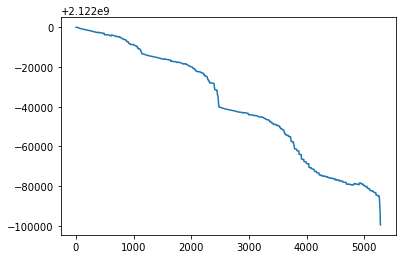

In [123]:
sns.lineplot(x = [i for i in range(len(ls))], y = ls);
print('Plot of population [pop - cases + revovered] per day')

In [124]:
df['Pop[p-c-r]'] = ls

In [125]:
df

,Date,Cases,Deaths,Recovered,Travel_history,Province,City,Pop[p-c-r]
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad,2.122000e+09
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi,2.122000e+09
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad,2.122000e+09
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi,2.122000e+09
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit,2.122000e+09
...,...,...,...,...,...,...,...,...
5277,5/30/2020,952,36,394,NaN,Punjab,Lahore,2.121906e+09
5278,5/31/2020,1184,22,120,NaN,Punjab,Lahore,2.121905e+09
5279,6/1/2020,1610,43,95,NaN,Punjab,Lahore,2.121903e+09
5280,6/2/2020,1639,30,353,NaN,Punjab,Lahore,2.121902e+09


### Creating Demand of MASKS WITH RESPECT TO COUNTRY'S POPULATION

In [126]:
df_1  = df.drop(columns = ['Travel_history','Province','City','Deaths'])

In [127]:
df_1

,Date,Cases,Recovered,Pop[p-c-r]
0,2/26/2020,1,0,2.122000e+09
1,2/26/2020,2,0,2.122000e+09
2,2/29/2020,1,0,2.122000e+09
3,2/29/2020,1,0,2.122000e+09
4,3/2/2020,1,0,2.122000e+09
...,...,...,...,...
5277,5/30/2020,952,394,2.121906e+09
5278,5/31/2020,1184,120,2.121905e+09
5279,6/1/2020,1610,95,2.121903e+09
5280,6/2/2020,1639,353,2.121902e+09


In [128]:
np.random.randint(low =0 , high =10)

2

Demand of MAsks Quantity through out the country per day


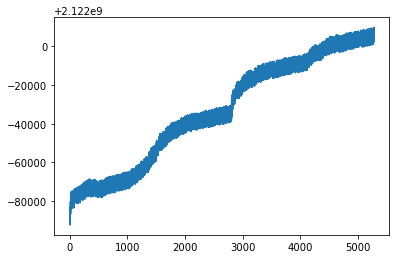

In [129]:
sns.lineplot(x = [i for i in range(len(ls))], y = [i+np.random.randint(low=1000,high=10000) for i in reversed(ls)]);
print("Demand of MAsks Quantity through out the country per day")

In [143]:
df_1['Mask(Y)']= [i+np.random.randint(low=1000,high=10000) for i in reversed(ls)]
df_1['Sanitizers(Y)'] = [i+np.random.randint(low=5000,high=200000) for i in reversed(ls)]

In [144]:
df_1

,Date,Cases,Recovered,Pop[p-c-r],Mask(Y),Sanitizers(y),Sanitizers(Y)
0,2/26/2020,1,0,2.122000e+09,2.121903e+09,2.122052e+09,2.122019e+09
1,2/26/2020,2,0,2.122000e+09,2.121904e+09,2.121962e+09,2.122030e+09
2,2/29/2020,1,0,2.122000e+09,2.121909e+09,2.122025e+09,2.122052e+09
3,2/29/2020,1,0,2.122000e+09,2.121908e+09,2.121976e+09,2.121916e+09
4,3/2/2020,1,0,2.122000e+09,2.121914e+09,2.122044e+09,2.121991e+09
...,...,...,...,...,...,...,...
5277,5/30/2020,952,394,2.121906e+09,2.122008e+09,2.122125e+09,2.122059e+09
5278,5/31/2020,1184,120,2.121905e+09,2.122007e+09,2.122123e+09,2.122100e+09
5279,6/1/2020,1610,95,2.121903e+09,2.122007e+09,2.122041e+09,2.122196e+09
5280,6/2/2020,1639,353,2.121902e+09,2.122005e+09,2.122042e+09,2.122156e+09


- Above is the dataset for demand in <b> Masks </b> and <b> Sanitizers </b> with respect to Cases throughout the country.
- one thing to note is that, these demands in <b> Masks</b> and <b> sanitizers </b> are for those individuals who are not
    been effected by the virus or now they have been recovered 
###### ---------------------------------------------------------------------------------------------------------------------------------------------------

## Creating DATASET WITH RESPECT TO PROVINCE

In [132]:
df

,Date,Cases,Deaths,Recovered,Travel_history,Province,City,Pop[p-c-r]
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad,2.122000e+09
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi,2.122000e+09
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad,2.122000e+09
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi,2.122000e+09
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit,2.122000e+09
...,...,...,...,...,...,...,...,...
5277,5/30/2020,952,36,394,NaN,Punjab,Lahore,2.121906e+09
5278,5/31/2020,1184,22,120,NaN,Punjab,Lahore,2.121905e+09
5279,6/1/2020,1610,43,95,NaN,Punjab,Lahore,2.121903e+09
5280,6/2/2020,1639,30,353,NaN,Punjab,Lahore,2.121902e+09


In [133]:
c= df['Cases']
r=df['Recovered']
prov =df['Province']

In [134]:
df_2= df.drop(columns = ['Travel_history','City','Deaths'])

In [135]:
df_2

,Date,Cases,Recovered,Province,Pop[p-c-r]
0,2/26/2020,1,0,Islamabad Capital Territory,2.122000e+09
1,2/26/2020,2,0,Sindh,2.122000e+09
2,2/29/2020,1,0,Islamabad Capital Territory,2.122000e+09
3,2/29/2020,1,0,Sindh,2.122000e+09
4,3/2/2020,1,0,Gilgit-Baltistan,2.122000e+09
...,...,...,...,...,...
5277,5/30/2020,952,394,Punjab,2.121906e+09
5278,5/31/2020,1184,120,Punjab,2.121905e+09
5279,6/1/2020,1610,95,Punjab,2.121903e+09
5280,6/2/2020,1639,353,Punjab,2.121902e+09


In [136]:
prop_pop = []
result = population_copy[df_2.iloc[0,3]]
for cx,rx,px in zip(c,r,prov):
    population_copy[px]  = population_copy[px] - cx
    population_copy[px]  = population_copy[px] + rx
    prop_pop.append(population_copy[px])

In [137]:
df_2['Prov_pop[Prov_pop-c+r]'] = prop_pop

In [138]:
df_2

,Date,Cases,Recovered,Province,Pop[p-c-r],Prov_pop[Prov_pop-c+r]
0,2/26/2020,1,0,Islamabad Capital Territory,2.122000e+09,13999999.0
1,2/26/2020,2,0,Sindh,2.122000e+09,48999998.0
2,2/29/2020,1,0,Islamabad Capital Territory,2.122000e+09,13999998.0
3,2/29/2020,1,0,Sindh,2.122000e+09,48999997.0
4,3/2/2020,1,0,Gilgit-Baltistan,2.122000e+09,14999999.0
...,...,...,...,...,...,...
5277,5/30/2020,952,394,Punjab,2.121906e+09,279962290.0
5278,5/31/2020,1184,120,Punjab,2.121905e+09,279961226.0
5279,6/1/2020,1610,95,Punjab,2.121903e+09,279959711.0
5280,6/2/2020,1639,353,Punjab,2.121902e+09,279958425.0


In [145]:
df_2['MaskPerProv(Y)'] = [i*np.random.randint(low=1000,high=10000) for i in reversed(df_2['Prov_pop[Prov_pop-c+r]'])]
df_2['SanitizersPerProv(Y)'] = [i*np.random.randint(low=5000,high=200000) for i in reversed(df_2['Prov_pop[Prov_pop-c+r]'])]

In [146]:
df_2

,Date,Cases,Recovered,Province,Pop[p-c-r],Prov_pop[Prov_pop-c+r],MaskPerProv(Y),SanitizersPerProv(Y)
0,2/26/2020,1,0,Islamabad Capital Territory,2.122000e+09,13999999.0,2.351639e+12,1.207147e+13
1,2/26/2020,2,0,Sindh,2.122000e+09,48999998.0,2.531664e+12,5.135277e+12
2,2/29/2020,1,0,Islamabad Capital Territory,2.122000e+09,13999998.0,3.418308e+11,4.711806e+13
3,2/29/2020,1,0,Sindh,2.122000e+09,48999997.0,2.306601e+12,5.583547e+12
4,3/2/2020,1,0,Gilgit-Baltistan,2.122000e+09,14999999.0,1.310503e+12,2.245774e+13
...,...,...,...,...,...,...,...,...
5277,5/30/2020,952,394,Punjab,2.121906e+09,279962290.0,7.237500e+10,3.317550e+11
5278,5/31/2020,1184,120,Punjab,2.121905e+09,279961226.0,1.800750e+11,1.127931e+12
5279,6/1/2020,1610,95,Punjab,2.121903e+09,279959711.0,7.249199e+10,1.105034e+12
5280,6/2/2020,1639,353,Punjab,2.121902e+09,279958425.0,1.020180e+11,4.270350e+11


- Above is the dataset for demand in <b> Masks </b> and <b> Sanitizers </b> with respect to Cases throughout the Provinces and capital.
- one thing to note is that, these demands in <b> Masks</b> and <b> sanitizers </b> are for those individuals who are not
    been effected by the virus or now they have been recovered 
###### ---------------------------------------------------------------------------------------------------------------------------------------------------

# Creating DataSet for the demand Shortage of ventilators with respect to City

<b> Assumption: </b>
- To create the demand of ventilators in this pendamic, we will be assuming that the recovered patients are being recovered due to use of ventilators and the death patients are now dead due to shortage of ventilators. 
- For Example, if the recovery rate is 60% and death rate is 40%, so based on our assumption there is a 40% demand shortage of ventilators that were supposed to be supplied

Creating Demand of ventilators with respect to recovries and death due to COVID 19

In [149]:
print(f"Mean of Cases is: {df['Cases'].sum()/len(df['Cases'])}")
print(f"Mean of Recoveries is: {df['Recovered'].sum()/len(df['Cases'])}")
print(f"Mean of Deaths is: {df['Deaths'].sum()/len(df['Cases'])}")


Mean of Cases is: 24.691594093146534
Mean of Recoveries is: 5.857061719045816
Mean of Deaths is: 0.503975766755017


Above result shows that 

In [152]:
(df['Recovered'].sum()/len(df['Cases']))/(df['Cases'].sum()/len(df['Cases']))

0.23720873172265203

In [153]:
(df['Deaths'].sum()/len(df['Cases']))/(df['Cases'].sum()/len(df['Cases']))

0.020410823410340357

- Above results are showing that the Recovery rate is 23.7% and Death Rate is 2% day
- Which means that the demand of Ventilators is 2% with respect to cases per day

In [154]:
vent_percent= 0.2

In [155]:
df

,Date,Cases,Deaths,Recovered,Travel_history,Province,City,Pop[p-c-r]
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad,2.122000e+09
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi,2.122000e+09
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad,2.122000e+09
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi,2.122000e+09
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit,2.122000e+09
...,...,...,...,...,...,...,...,...
5277,5/30/2020,952,36,394,NaN,Punjab,Lahore,2.121906e+09
5278,5/31/2020,1184,22,120,NaN,Punjab,Lahore,2.121905e+09
5279,6/1/2020,1610,43,95,NaN,Punjab,Lahore,2.121903e+09
5280,6/2/2020,1639,30,353,NaN,Punjab,Lahore,2.121902e+09


In [156]:
df_3 = df.copy()

In [159]:
v = []
for i in df_3['Cases']:
    v.append(int(i*vent_percent))

In [163]:
df_3['Ventilators_shortage/Day'] = v

In [165]:
df_3

,Date,Cases,Deaths,Recovered,Travel_history,Province,City,Pop[p-c-r],Ventilators_shortage/Day
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad,2.122000e+09,0
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi,2.122000e+09,0
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad,2.122000e+09,0
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi,2.122000e+09,0
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit,2.122000e+09,0
...,...,...,...,...,...,...,...,...,...
5277,5/30/2020,952,36,394,NaN,Punjab,Lahore,2.121906e+09,190
5278,5/31/2020,1184,22,120,NaN,Punjab,Lahore,2.121905e+09,236
5279,6/1/2020,1610,43,95,NaN,Punjab,Lahore,2.121903e+09,322
5280,6/2/2020,1639,30,353,NaN,Punjab,Lahore,2.121902e+09,327
